In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
import sklearn.metrics 
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from numpy import interp
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

In [3]:
# When the value of i-th feature are zero, we will delete this feature.
def Delnullfeatures(features):
    list_delete = []
    for i in range(features.shape[1]):
        if sum(features[:,i])==0:
            list_delete.append(i)
    features_new = np.delete(features, list_delete, axis=1)
    return features_new

In [4]:
import numpy as np

In [7]:
k_mer = np.load("C:/Users/Jensen Wang/Desktop/Supp/HSapiens8mer.npy")
# Read sequence order correlated factors
theta_list = np.load("C:/Users/Jensen Wang/Desktop/Supp/HSapiensSeqOrder.npy")
# Concatenate the 8-mer nucleotide composition and sequence order correlated factors
features = np.column_stack((k_mer,theta_list))
featuresdelnull = Delnullfeatures(features)
print(featuresdelnull.shape)
np.save('C:/Users/Jensen Wang/Desktop/Supp/HSapiensFeatures.npy',featuresdelnull)

(990, 11675)


In [8]:
k_mer = np.load("C:/Users/Jensen Wang/Desktop/Supp/SCerevisiae8mer.npy")
# Read sequence order correlated factors
theta_list = np.load("C:/Users/Jensen Wang/Desktop/Supp/SCerevisiaeSeqOrder.npy")
# Concatenate the 8-mer nucleotide composition and sequence order correlated factors
features = np.column_stack((k_mer,theta_list))
featuresdelnull = Delnullfeatures(features)
print(featuresdelnull.shape)
np.save('C:/Users/Jensen Wang/Desktop/Supp/SCerevisiaeFeatures.npy',featuresdelnull)

(628, 12724)


In [9]:
k_mer = np.load("C:/Users/Jensen Wang/Desktop/Supp/MMusculus8mer.npy")
# Read sequence order correlated factors
theta_list = np.load("C:/Users/Jensen Wang/Desktop/Supp/MMusculusSeqOrder.npy")
# Concatenate the 8-mer nucleotide composition and sequence order correlated factors
features = np.column_stack((k_mer,theta_list))
featuresdelnull = Delnullfeatures(features)
print(featuresdelnull.shape)
np.save('C:/Users/Jensen Wang/Desktop/Supp/MMusculusFeatures.npy',featuresdelnull)

(944, 11232)


In [11]:
k_mer = np.load("C:/Users/Jensen Wang/Desktop/Supp/IndependentHSapiens8mer.npy")
# Read sequence order correlated factors
theta_list = np.load("C:/Users/Jensen Wang/Desktop/Supp/IndeptHSapiensSeqOrder.npy")
# Concatenate the 8-mer nucleotide composition and sequence order correlated factors
features = np.column_stack((k_mer,theta_list))
featuresdelnull = Delnullfeatures(features)
print(featuresdelnull.shape)
np.save('C:/Users/Jensen Wang/Desktop/Supp/IndeptHSapiensFeatures.npy',featuresdelnull)

(200, 2267)


In [12]:
k_mer = np.load("C:/Users/Jensen Wang/Desktop/Supp/IndependentSCerevisiae8mer.npy")
# Read sequence order correlated factors
theta_list = np.load("C:/Users/Jensen Wang/Desktop/Supp/IndeptSCerevisiaeSeqOrder.npy")
# Concatenate the 8-mer nucleotide composition and sequence order correlated factors
features = np.column_stack((k_mer,theta_list))
featuresdelnull = Delnullfeatures(features)
print(featuresdelnull.shape)
np.save('C:/Users/Jensen Wang/Desktop/Supp/IndeptSCerevisiaeFeatures.npy',featuresdelnull)

(200, 3965)


# H.SapiensFeatures

In [4]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
HSapiensFeatures = np.load('C:/Users/Jensen Wang/Desktop/Supp/HSapiensFeatures.npy')
HSapiensScaled = MinMaxScaler().fit_transform(HSapiensFeatures)

In [5]:
print(HSapiensScaled.shape)

(990, 11675)


In [6]:
target = np.load("C:/Users/Jensen Wang/Desktop/Supp/TargetHSapiens.npy")
print(target.shape)

(990,)


In [4]:
from sklearn.feature_selection import SelectPercentile,chi2
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import math
scorelist = []
percentilenumber = []
featurenumber = []
HSapiensScaledshape = HSapiensScaled.shape
for i in np.arange(start=0.1,stop=20,step=0.1):
    selector = SelectPercentile(chi2,percentile=i)
    percentilenumber.append(math.floor(HSapiensScaledshape[1]*i))
    features_selected = selector.fit_transform(HSapiensScaled,target)
    print(features_selected.shape)
    featurenumber.append(features_selected.shape[1])
    clf = LogisticRegression(random_state=1)
    scores = cross_val_score(clf,features_selected,target,cv=5)
    print('The test accuracy scores are: {} \n'.format(scores))
    print('The mean test accuracy scores are: {} \n'.format(np.mean(scores)))
    scorelist.extend([np.mean(scores)])

(990, 11)
The test accuracy scores are: [0.51010101 0.52525253 0.53535354 0.52020202 0.53030303] 

The mean test accuracy scores are: 0.5242424242424243 

(990, 23)
The test accuracy scores are: [0.52020202 0.54545455 0.52525253 0.52525253 0.53030303] 

The mean test accuracy scores are: 0.5292929292929294 

(990, 35)
The test accuracy scores are: [0.55555556 0.57070707 0.53535354 0.54040404 0.54545455] 

The mean test accuracy scores are: 0.5494949494949496 

(990, 46)
The test accuracy scores are: [0.56565657 0.58080808 0.54545455 0.54040404 0.56565657] 

The mean test accuracy scores are: 0.5595959595959596 

(990, 59)
The test accuracy scores are: [0.57575758 0.59090909 0.56060606 0.55050505 0.58585859] 

The mean test accuracy scores are: 0.5727272727272726 

(990, 70)
The test accuracy scores are: [0.59090909 0.59090909 0.57575758 0.55555556 0.6010101 ] 

The mean test accuracy scores are: 0.5828282828282829 

(990, 81)
The test accuracy scores are: [0.60606061 0.5959596  0.62121

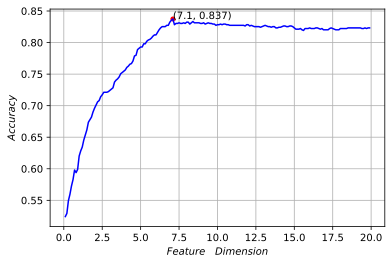

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
percentilenumber =  np.arange(start=0.1,stop=20,step=0.1)
percentilenumber.shape = [199,1]
max_index=np.argmax(scorelist)
plt.plot(percentilenumber[max_index],scorelist[max_index],'.r',markersize=8)
plt.text(percentilenumber[max_index],scorelist[max_index],(percentilenumber[max_index][0],(np.around(scorelist[max_index],decimals=3))))
# plt.vlines(percentilenumber[max_index][0],ymin=0,ymax=scorelist[max_indx],colors='k',linestyles='dashed')
# plt.hlines(scorelist[max_indx],xmin=0,xmax=percentilenumber[max_index][0],linestyles='--',colors='k')
plt.plot(percentilenumber,scorelist,'b',markeredgecolor='k')
ax = plt.gca()
ax.set_xlabel('$\it{Feature\quadDimension}$') 
ax.set_ylabel('$\it{Accuracy}$') 
ax.grid()
# plt.savefig('C:/Users/Jensen Wang/Desktop/Supp/HSapiensFeatureNumSeleted.eps',dpi=600,format='eps',bbox_inches='tight')
plt.show()

In [7]:
print('The selected feature numbers are: {}'.format(featurenumber[max_index]))

The selected feature numbers are: 828


In [7]:
from sklearn.feature_selection import SelectPercentile,chi2
selector = SelectPercentile(chi2,percentile=7.1)
features_selected = selector.fit_transform(HSapiensScaled,target)
print(features_selected.shape)

(990, 828)


In [9]:
IndeptHSapiensFeatures = np.load('C:/Users/Jensen Wang/Desktop/Supp/IndeptHSapiensFeatures.npy')
IndeptHSapiensScaled = MinMaxScaler().fit_transform(IndeptHSapiensFeatures)
print(IndeptHSapiensScaled.shape)
IndeptHSapiensTarget = np.load("C:/Users/Jensen Wang/Desktop/Supp/IndeptTargetHSapiens.npy")
print(IndeptHSapiensTarget.shape)

(200, 2267)
(200,)


In [10]:
from sklearn.feature_selection import SelectPercentile,chi2
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import math
Indept1scorelist = []
Indept1percentilenumber = []
Indept1featurenumber = []
IndeptHSapiensScaledshape = IndeptHSapiensScaled.shape
for i in np.arange(start=0.1,stop=20,step=0.1):
    selector = SelectPercentile(chi2,percentile=i)
    Indept1percentilenumber.append(round(i*0.01,3))
    Indept1features_selected = selector.fit_transform(IndeptHSapiensScaled,IndeptHSapiensTarget)
    print(Indept1features_selected.shape)
    Indept1featurenumber.append(Indept1features_selected.shape[1])
    clf = LogisticRegression(random_state=1)
    Indept1scores = cross_val_score(clf,Indept1features_selected,IndeptHSapiensTarget,cv=5)
    print('The test accuracy scores are: {} \n'.format(Indept1scores))
    print('The mean test accuracy scores are: {} \n'.format(np.mean(Indept1scores)))
    Indept1scorelist.extend([np.mean(Indept1scores)])

(200, 2)
The test accuracy scores are: [0.55  0.7   0.5   0.525 0.6  ] 

The mean test accuracy scores are: 0.575 

(200, 5)
The test accuracy scores are: [0.55  0.7   0.5   0.525 0.6  ] 

The mean test accuracy scores are: 0.575 

(200, 6)
The test accuracy scores are: [0.55  0.7   0.5   0.525 0.6  ] 

The mean test accuracy scores are: 0.575 

(200, 10)
The test accuracy scores are: [0.55  0.7   0.5   0.525 0.6  ] 

The mean test accuracy scores are: 0.575 

(200, 11)
The test accuracy scores are: [0.55  0.7   0.5   0.525 0.6  ] 

The mean test accuracy scores are: 0.575 

(200, 13)
The test accuracy scores are: [0.575 0.825 0.55  0.525 0.675] 

The mean test accuracy scores are: 0.6300000000000001 

(200, 15)
The test accuracy scores are: [0.575 0.825 0.55  0.525 0.675] 

The mean test accuracy scores are: 0.6300000000000001 

(200, 18)
The test accuracy scores are: [0.575 0.825 0.55  0.525 0.675] 

The mean test accuracy scores are: 0.6300000000000001 

(200, 20)
The test accuracy 

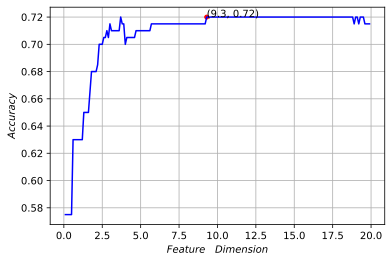

In [11]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
percentilenumber =  np.arange(start=0.1,stop=20,step=0.1)
percentilenumber.shape = [199,1]
max_index=np.argmax(Indept1scorelist)
plt.plot(percentilenumber[max_index], Indept1scorelist[max_index],'.r',markersize=8)
plt.text(percentilenumber[max_index], Indept1scorelist[max_index],(percentilenumber[max_index][0],(np.around(Indept1scorelist[max_index],decimals=3))))
# plt.vlines(percentilenumber[max_index][0],ymin=0,ymax=scorelist[max_indx],colors='k',linestyles='dashed')
# plt.hlines(scorelist[max_indx],xmin=0,xmax=percentilenumber[max_index][0],linestyles='--',colors='k')
plt.plot(percentilenumber,Indept1scorelist,'b',markeredgecolor='k')
ax = plt.gca()
ax.set_xlabel('$\it{Feature\quadDimension}$') 
ax.set_ylabel('$\it{Accuracy}$') 
ax.grid()
# plt.savefig('C:/Users/Jensen Wang/Desktop/Supp/IndetpHSapiensFeatureseleted.eps',dpi=900,format='eps',bbox_inches='tight')
plt.show()

In [12]:
print('The selected feature numbers are: {}'.format(Indept1featurenumber[max_index]))

The selected feature numbers are: 210


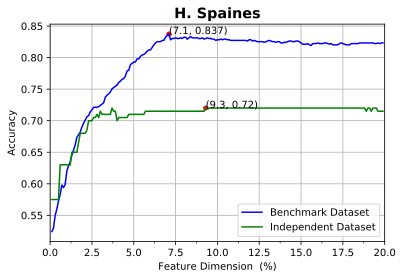

In [19]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
percentilenumber =  np.arange(start=0.1,stop=20,step=0.1)
percentilenumber.shape = [199,1]
HSpainesmax_index=np.argmax(scorelist)
Indept1max_index=np.argmax(Indept1scorelist)
plt.plot(percentilenumber[HSpainesmax_index],scorelist[HSpainesmax_index],'.r',markersize=8)
plt.text(percentilenumber[HSpainesmax_index],scorelist[HSpainesmax_index],(percentilenumber[HSpainesmax_index][0],(np.around(scorelist[HSpainesmax_index],decimals=3))))
p1 = plt.plot(percentilenumber,scorelist,'b',label='Benchmark Dataset')
plt.plot(percentilenumber[Indept1max_index], Indept1scorelist[Indept1max_index],'.r',markersize=8)
plt.text(percentilenumber[Indept1max_index], Indept1scorelist[Indept1max_index],(percentilenumber[Indept1max_index][0],(np.around(Indept1scorelist[Indept1max_index],decimals=3))))
p2 = plt.plot(percentilenumber,Indept1scorelist,'g',label='Independent Dataset')
plt.legend()
ax = plt.gca()
plt.xlim(0,20)
ax.set_xlabel('Feature Dimension  (%)') 
ax.set_ylabel('Accuracy') 
ax.grid()
ax.xaxis.set_minor_locator(MultipleLocator(1.25))
ax.yaxis.set_minor_locator(MultipleLocator(1.25))
plt.title('H. Spaines',fontsize='x-large',fontweight='heavy')
plt.savefig('C:/Users/Jensen Wang/Desktop/Supp/HSapiensFeatureNumSeleted.svg',dpi=1200,format='svg',bbox_inches='tight')
plt.show()

In [9]:
selector = SelectPercentile(chi2,percentile=9.3)
Indept1features_selected = selector.fit_transform(IndeptHSapiensScaled,IndeptHSapiensTarget)

In [10]:
print(Indept1features_selected.shape)

(200, 210)


## HSapiens SVM

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {"C":[pow(2, k) for k in range(-5, 15)],"gamma":[pow(2, k) for k in range(-15, 5)]}
clf = SVC(kernel='rbf',random_state=1)
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
grid_search.fit(features_selected,target)
print('SVM model selected : \n')
print('-------------------------------------')
print('The best params is:{}\n'.format(grid_search.best_params_))
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))
#print('The roc_auc score is: {:.4f}'.format(roc_auc_score(y_true,y_pred)))
#print('The average precision(AP) score is {:.4f}'.format(average_precision_score()))
print('-------------------------------------')

SVM model selected : 

-------------------------------------
The best params is:{'C': 128, 'gamma': 0.00048828125}

The best test score is:0.8556

-------------------------------------


## HSpaniens RandomForest

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1,criterion='gini')
param_grid = {}
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,target)
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))

The best test score is:0.9559



In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {"n_estimators":[i for i in range(10,160,10)]}
clf = RandomForestClassifier(random_state=1,criterion='gini',verbose=1)
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,target)
print('RandomForest model selected : \n')
print('-------------------------------------')
print('The best params is:{}\n'.format(grid_search.best_params_))
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))
print('-------------------------------------')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForest model selected : 

-------------------------------------
The best params is:{'n_estimators': 140}

The best test score is:0.9562

-------------------------------------


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {"max_features":[i for i in range(10,110,10)]}
clf = RandomForestClassifier(random_state=1,criterion='gini',verbose=1,n_estimators=140,oob_score=True)
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,target)
print('RandomForest model selected : \n')
print('-------------------------------------')
print('The best params is:{}\n'.format(grid_search.best_params_))
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))
print('-------------------------------------')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForest model selected : 

-------------------------------------
The best params is:{'max_features': 10}

The best test score is:0.9562

-------------------------------------


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.5s finished


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {"max_depth":[i for i in range(10,110,10)],"min_samples_split":[i for i in (2,11)]}
clf = RandomForestClassifier(random_state=1,criterion='gini',verbose=1,n_estimators=140,max_features=10,oob_score=True)
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,target)
print('RandomForest model selected : \n')
print('-------------------------------------')
print('The best params is:{}\n'.format(grid_search.best_params_))
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))
print('-------------------------------------')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForest model selected : 

-------------------------------------
The best params is:{'max_depth': 100, 'min_samples_split': 2}

The best test score is:0.9553

-------------------------------------


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.3s finished


## HSpaniens PassiveAggressive

In [10]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier(random_state=1)
param_grid = {}
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,target)
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))

The best test score is:0.9464



In [28]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier(random_state=1)
param_grid = {'C':[i for i in np.linspace(start=0.001,stop=100,num=10000,endpoint=True,dtype=float)]}
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,target)
print('The best params is:{}\n'.format(grid_search.best_params_))
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))

The best params is:{'C': 0.031002700270027002}

The best test score is:0.9580



In [29]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier(C=0.0310027,random_state=1)
param_grid = {'fit_intercept':[True,False],'loss':['hinge','squared_hinge']}
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,target)
print('The best params is:{}\n'.format(grid_search.best_params_))
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))

The best params is:{'fit_intercept': False, 'loss': 'hinge'}

The best test score is:0.9580



In [7]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import LeaveOneOut

def RandomForestclf(n_estimators,max_features,min_samples_split,max_depth):
    clf = RandomForestClassifier(random_state=1,criterion='gini',n_estimators=n_estimators,max_features=max_features,
                                 min_samples_split=min_samples_split,max_depth=max_depth,min_samples_leaf=1,oob_score=True,n_jobs=-1)
    return clf

def svm(C,gamma):
    clf = SVC(kernel='rbf',C=C,gamma=gamma,random_state=1,decision_function_shape='ovr')
    return clf

def PAclf(C,fit_intercept,loss):
    clf = PassiveAggressiveClassifier(C=C,fit_intercept=fit_intercept,loss=loss,random_state=1)
    return clf    
    
kfold = KFold(10,shuffle=True,random_state=1)

def KfoldEvaluate(clf,features_selected,target):
    acclist = []
    mcclist = []
    snlist = []
    splist = []
    target_scores = []
    targetchange = []   #targetchange is shuffled target class in k-fold cv
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 200)
    for k,(train,test) in enumerate(kfold.split(features_selected,target)):
        clffit = clf.fit(features_selected[train],target[train])
        if hasattr(clf,'predict_proba')==True:
            testscore = clffit.predict_proba(features_selected[test])
            target_scores.extend(testscore[:,1].ravel().tolist())
        else:
            testscore = clffit.decision_function(features_selected[test])
            target_scores.extend(testscore.ravel().tolist())
        target_class = clffit.predict(features_selected[test])  # target_class is predicted target class
        targetchange.extend(target[test].ravel().tolist())
        confusiontable = confusion_matrix(target[test],target_class,labels=[1,-1])
        tp = confusiontable[0,0]
        fn = confusiontable[0,1]
        fp = confusiontable[1,0]
        tn = confusiontable[1,1]
        sn = tp/(tp+fn)
        sp = tn/(tn+fp)
        snlist.append(sn)
        splist.append(sp)
        acclist.append(accuracy_score(target[test],target_class))
        mcclist.append(matthews_corrcoef(target[test],target_class))
    acc = np.mean(np.array(acclist))
    mcc = np.mean(np.array(mcclist))
    sn = np.mean(np.array(snlist))
    sp = np.mean(np.array(splist))
    targetscore = np.array(target_scores)
    targetchange = np.array(targetchange)
    fpr,tpr,thersholds = roc_curve(targetchange.ravel(),targetscore.ravel())
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0 
    mean_tpr[-1] = 1.0
    mean_auroc = auc(mean_fpr,mean_tpr)
    return (acc,mcc,sn,sp,mean_auroc,mean_fpr,mean_tpr)

loo = LeaveOneOut()

def LooEvaluate(clf,features_selected,target):
    targetclass = []
    snlist = []
    splist = []
    target_scores = []
    targetchange = []#targetchange is shuffled target class in k-fold cv
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 200) 
    for k,(train,test) in enumerate(loo.split(features_selected,target)):
        clffit = clf.fit(features_selected[train],target[train])
        if hasattr(clf,'predict_proba')==True:
            testscore = clffit.predict_proba(features_selected[test])
            target_scores.extend(testscore[:,1].ravel().tolist())
        else:
            testscore = clffit.decision_function(features_selected[test])
            target_scores.extend(testscore.ravel().tolist())
        target_class = clffit.predict(features_selected[test])   # target_class is predicted target class
        targetclass.extend(target_class.ravel().tolist())     # target_class is predicted target class
        targetchange.extend(target[test].ravel().tolist())   #targetchange is shuffled target class in k-fold cv
    confusiontable = confusion_matrix(targetchange,targetclass,labels=[1,-1])
    tp = confusiontable[0,0]
    fn = confusiontable[0,1]
    fp = confusiontable[1,0]
    tn = confusiontable[1,1]
    sn = tp/(tp+fn)
    sp = tn/(tn+fp)
    snlist.append(sn)
    splist.append(sp)    
    acc = accuracy_score(targetchange,targetclass)
    mcc = matthews_corrcoef(targetchange,targetclass)
    sn = np.mean(np.array(snlist))
    sp = np.mean(np.array(splist))
    targetscore = np.array(target_scores)
    targetchange = np.array(targetchange)
    fpr,tpr,thersholds = roc_curve(targetchange.ravel(),targetscore.ravel())
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0 
    mean_tpr[-1] = 1.0 
    mean_auroc = auc(mean_fpr,mean_tpr)
    return (acc,mcc,sn,sp,mean_auroc,mean_fpr,mean_tpr)

In [12]:
rfH0 = RandomForestclf(n_estimators=140,max_features=10,min_samples_split=2,max_depth=None)
acc_rfH0,mcc_rfH0,sn_rfH0,sp_rfH0,auroc_rfH0,mean_fpr_rfH0,mean_tpr_rfH0 = KfoldEvaluate(rfH0,features_selected,target)
print('Acc is {} .'.format(acc_rfH0))
print('Mcc is {} .'.format(mcc_rfH0))
print('Sn is {} .'.format(sn_rfH0))
print('Sp is {} .'.format(sp_rfH0))
print('Auroc is {} .'.format(auroc_rfH0))
# print('Targetscore are \n{} .'.format(targetscore_rfH0))
# print('Target after 10-fold acrossvalidation shuffle \n{}'.format(targetchange_rfH0))

acc_rfH1,mcc_rfH1,sn_rfH1,sp_rfH1,auroc_rfH1,mean_fpr_rfH1,mean_tpr_rfH1 = KfoldEvaluate(rfH0,Indept1features_selected,IndeptHSapiensTarget)
print('Acc is {} .'.format(acc_rfH1))
print('Mcc is {} .'.format(mcc_rfH1))
print('Sn is {} .'.format(sn_rfH1))
print('Sp is {} .'.format(sp_rfH1))
print('Auroc is {} .'.format(auroc_rfH1))

acc_rfH0loo,mcc_rfH0loo,sn_rfH0loo,sp_rfH0loo,auroc_rfH0loo,mean_fpr_rfH0loo,mean_tpr_rfH0loo = LooEvaluate(rfH0,features_selected,target)
print('Acc is {} .'.format(acc_rfH0loo))
print('Mcc is {} .'.format(mcc_rfH0loo))
print('Sn is {} .'.format(sn_rfH0loo))
print('Sp is {} .'.format(sp_rfH0loo))
print('Auroc is {} .'.format(auroc_rfH0loo))

acc_rfH1loo,mcc_rfH1loo,sn_rfH1loo,sp_rfH1loo,auroc_rfH1loo,mean_fpr_rfH1loo,mean_tpr_rfH1loo = LooEvaluate(rfH0,Indept1features_selected,IndeptHSapiensTarget)
print('Acc is {} .'.format(acc_rfH1loo))
print('Mcc is {} .'.format(mcc_rfH1loo))
print('Sn is {} .'.format(sn_rfH1loo))
print('Sp is {} .'.format(sp_rfH1loo))
print('Auroc is {} .'.format(auroc_rfH1loo))

svmH0 = svm(C=128,gamma=0.00048828125)
acc_svmH0,mcc_svmH0,sn_svmH0,sp_svmH0,auroc_svmH0,mean_fpr_svmH0,mean_tpr_svmH0 = KfoldEvaluate(svmH0,features_selected,target)
print('Acc is {} .'.format(acc_svmH0))
print('Mcc is {} .'.format(mcc_svmH0))
print('Sn is {} .'.format(sn_svmH0))
print('Sp is {} .'.format(sp_svmH0))
print('Auroc is {} .'.format(auroc_svmH0))


acc_svmH1,mcc_svmH1,sn_svmH1,sp_svmH1,auroc_svmH1,mean_fpr_svmH1,mean_tpr_svmH1 = KfoldEvaluate(svmH0,Indept1features_selected,IndeptHSapiensTarget)
print('Acc is {} .'.format(acc_svmH1))
print('Mcc is {} .'.format(mcc_svmH1))
print('Sn is {} .'.format(sn_svmH1))
print('Sp is {} .'.format(sp_svmH1))
print('Auroc is {} .'.format(auroc_svmH1))

Acc is 0.8414141414141415 .
Mcc is 0.7198697642917324 .
Sn is 0.9111839300937767 .
Sp is 0.7717666511900754 .
Auroc is 0.9446608307370488 .
Acc is 0.795 .
Mcc is 0.661987510032465 .
Sn is 0.6219821844821845 .
Sp is 1.0 .
Auroc is 0.8389805812984521 .
Acc is 0.8717171717171717 .
Mcc is 0.7683358754065774 .
Sn is 0.997979797979798 .
Sp is 0.7454545454545455 .
Auroc is 0.9337140246687985 .
Acc is 0.8 .
Mcc is 0.6546536707079772 .
Sn is 0.6 .
Sp is 1.0 .
Auroc is 0.7948241206030151 .
Acc is 0.8212121212121211 .
Mcc is 0.6947692242547697 .
Sn is 0.9143611205503788 .
Sp is 0.7448177436593086 .
Auroc is 0.9317361887101955 .
Acc is 0.72 .
Mcc is 0.5214427507427984 .
Sn is 0.44058857808857804 .
Sp is 1.0 .
Auroc is 0.8057672786040757 .


C:\downloadware\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


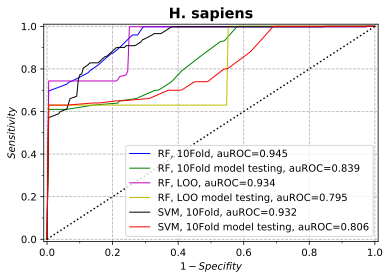

In [14]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from matplotlib.ticker import MultipleLocator
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
p1 = plt.plot(mean_fpr_rfH0,mean_tpr_rfH0,linewidth=1,c='b')
p2 = plt.plot(mean_fpr_rfH1,mean_tpr_rfH1,linewidth=1,c='g')
p3= plt.plot(mean_fpr_rfH0loo,mean_tpr_rfH0loo,linewidth=1,c='m')
p4 = plt.plot(mean_fpr_rfH1loo,mean_tpr_rfH1loo,linewidth=1,c='y')
p5 = plt.plot(mean_fpr_svmH0,mean_tpr_svmH0,linewidth=1,c='k')
p6 = plt.plot(mean_fpr_svmH1,mean_tpr_svmH1,linewidth=1,c='r')
plt.legend([p1,p2,p3,p4,p5,p6],labels=['RF, 10Fold, auROC=0.945','RF, 10Fold model testing, auROC=0.839','RF, LOO, auROC=0.934','RF, LOO model testing, auROC=0.795','SVM, 10Fold, auROC=0.932','SVM, 10Fold model testing, auROC=0.806'],
          loc='lower right')
plt.title('H. sapiens',fontsize='x-large',fontweight='heavy')
x = np.linspace(0,1,200)
y = np.linspace(0,1,200)
plt.plot(x,y,':k')
ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True,which='major',axis='both',linestyle='--')
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)
plt.xlabel('$\it{1-Specifity }$')
plt.ylabel('$\it{Sensitivity}$')
plt.savefig('C:/Users/Jensen Wang/Desktop/Supp/HSapiensROCcurve.svg',dpi=1200,format='svg',bbox_inches='tight')
plt.show()

In [15]:
PAclfH0 = PAclf(C=0.0310027,fit_intercept=False,loss='hinge')
acc_PAclfH0,mcc_PAclfH0,sn_PAclfH0,sp_PAclfH0,auroc_PAclfH0,mean_fpr_PAclfH0,mean_tpr_PAclfH0 = KfoldEvaluate(PAclfH0,features_selected,target)
print('Acc is {} .'.format(acc_PAclfH0))
print('Mcc is {} .'.format(mcc_PAclfH0))
print('Sn is {} .'.format(sn_PAclfH0))
print('Sp is {} .'.format(sp_PAclfH0))
print('Auroc is {} .'.format(auroc_PAclfH0))

acc_PAclfH1,mcc_PAclfH1,sn_PAclfH1,sp_PAclfH1,auroc_PAclfH1,mean_fpr_PAclfH1,mean_tpr_PAclfH1 = KfoldEvaluate(PAclfH0,Indept1features_selected,IndeptHSapiensTarget)
print('Acc is {} .'.format(acc_PAclfH1))
print('Mcc is {} .'.format(mcc_PAclfH1))
print('Sn is {} .'.format(sn_PAclfH1))
print('Sp is {} .'.format(sp_PAclfH1))
print('Auroc is {} .'.format(auroc_PAclfH1))

acc_PAclfH0loo,mcc_PAclfH0loo,sn_PAclfH0loo,sp_PAclfH0loo,auroc_PAclfH0loo,mean_fpr_PAclfH0loo,mean_tpr_PAclfH0loo = LooEvaluate(PAclfH0,features_selected,target)
print('Acc is {} .'.format(acc_PAclfH0loo))
print('Mcc is {} .'.format(mcc_PAclfH0loo))
print('Sn is {} .'.format(sn_PAclfH0loo))
print('Sp is {} .'.format(sp_PAclfH0loo))
print('Auroc is {} .'.format(auroc_PAclfH0loo))

acc_PAclfH1loo,mcc_PAclfH1loo,sn_PAclfH1loo,sp_PAclfH1loo,auroc_PAclfH1loo,mean_fpr_PAclfH1loo,mean_tpr_PAclfH1loo = LooEvaluate(PAclfH0,Indept1features_selected,IndeptHSapiensTarget)
print('Acc is {} .'.format(acc_PAclfH1loo))
print('Mcc is {} .'.format(mcc_PAclfH1loo))
print('Sn is {} .'.format(sn_PAclfH1loo))
print('Sp is {} .'.format(sp_PAclfH1loo))
print('Auroc is {} .'.format(auroc_PAclfH1loo))

Acc is 0.8535353535353535 .
Mcc is 0.7411003309520736 .
Sn is 0.709020469797324 .
Sp is 1.0 .
Auroc is 0.9577424417051007 .
Acc is 0.8099999999999999 .
Mcc is 0.68667778228947 .
Sn is 0.6544497169497171 .
Sp is 1.0 .
Auroc is 0.8920400999974748 .
Acc is 0.8717171717171717 .
Mcc is 0.7691812994233782 .
Sn is 0.7434343434343434 .
Sp is 1.0 .
Auroc is 0.9656728414140416 .
Acc is 0.815 .
Mcc is 0.6781253679066579 .
Sn is 0.63 .
Sp is 1.0 .
Auroc is 0.8966649832074948 .


C:\downloadware\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  if sys.path[0] == '':


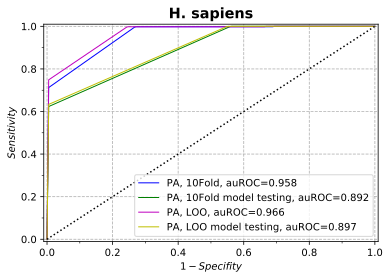

In [16]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from matplotlib.ticker import MultipleLocator
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
p1 = plt.plot(mean_fpr_PAclfH0,mean_tpr_PAclfH0,linewidth=1,c='b')
p2 = plt.plot(mean_fpr_PAclfH1,mean_tpr_PAclfH1,linewidth=1,c='g')
p3= plt.plot(mean_fpr_PAclfH0loo,mean_tpr_PAclfH0loo,linewidth=1,c='m')
p4 = plt.plot(mean_fpr_PAclfH1loo,mean_tpr_PAclfH1loo,linewidth=1,c='y')
plt.legend([p1,p2,p3,p4],labels=['PA, 10Fold, auROC=0.958','PA, 10Fold model testing, auROC=0.892','PA, LOO, auROC=0.966','PA, LOO model testing, auROC=0.897'],
          loc='lower right')
plt.title('H. sapiens',fontsize='x-large',fontweight='heavy')
x = np.linspace(0,1,200)
y = np.linspace(0,1,200)
plt.plot(x,y,':k')
ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True,which='major',axis='both',linestyle='--')
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)
plt.xlabel('$\it{1-Specifity }$')
plt.ylabel('$\it{Sensitivity}$')
plt.savefig('C:/Users/Jensen Wang/Desktop/Supp/HSapiensPAclfROCcurve.svg',dpi=1200,format='svg',bbox_inches='tight')
plt.show()

### H. Sapiens Without Feture Selected 

In [10]:
PAclfH0 = PAclf(C=0.0310027,fit_intercept=False,loss='hinge')
acc_PAclfH0o_loo,mcc_PAclfH0o_loo,sn_PAclfH0o_loo,sp_PAclfH0o_loo,auroc_PAclfH0o_loo,mean_fpr_PAclfH0o_loo,mean_tpr_PAclfH0o_loo = LooEvaluate(PAclfH0,HSapiensScaled,target)
print('Acc is {} .'.format(acc_PAclfH0o_loo))
print('Mcc is {} .'.format(mcc_PAclfH0o_loo))
print('Sn is {} .'.format(sn_PAclfH0o_loo))
print('Sp is {} .'.format(sp_PAclfH0o_loo))
print('Auroc is {} .'.format(auroc_PAclfH0o_loo))

acc_PAclfH1o_loo,mcc_PAclfH1o_loo,sn_PAclfH1o_loo,sp_PAclfH1o_loo,auroc_PAclfH1o_loo,mean_fpr_PAclfH1o_loo,mean_tpr_PAclfH1o_loo = LooEvaluate(PAclfH0,IndeptHSapiensScaled,IndeptHSapiensTarget)
print('Acc is {} .'.format(acc_PAclfH1o_loo))
print('Mcc is {} .'.format(mcc_PAclfH1o_loo))
print('Sn is {} .'.format(sn_PAclfH1o_loo))
print('Sp is {} .'.format(sp_PAclfH1o_loo))
print('Auroc is {} .'.format(auroc_PAclfH1o_loo))

Acc is 0.5202020202020202 .
Mcc is 0.04075695729696112 .
Sn is 0.5858585858585859 .
Sp is 0.45454545454545453 .
Auroc is 0.5389726409826912 .
Acc is 0.735 .
Mcc is 0.5104174815042761 .
Sn is 0.54 .
Sp is 0.93 .
Auroc is 0.6977386934673367 .


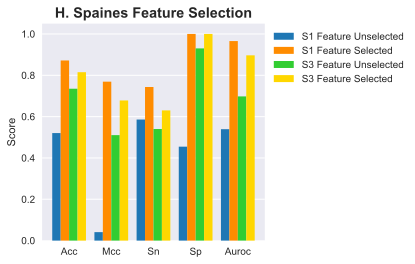

In [7]:
# import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn')
fig = plt.figure(figsize=(4,4))
plt.title('H. Spaines Feature Selection',fontsize='x-large',fontweight='heavy')
barwith = 0.2
x = np.arange(5)
yHo = [0.5202020202020202,0.04075695729696112,0.5858585858585859,0.45454545454545453,0.5389726409826912]
yHindepto = [0.735,0.5104174815042761,0.54,0.93,0.6977386934673367]
yH = [0.8717171717171717,0.7691812994233782,0.7434343434343434,1.0,0.9656728414140416]
yHindept = [0.815,0.6781253679066579,0.63,1.0,0.8966649832074948]
plt.bar(x=x,height=yHo,width=barwith,color='tab:blue',align='center',label='S1 Feature Unselected')
plt.bar(x=x+barwith,height=yH,width=barwith,color='darkorange',align='center',label='S1 Feature Selected')
plt.bar(x=x+barwith*2,height=yHindepto,width=barwith,color='limegreen',align='center',label='S3 Feature Unselected')
plt.bar(x=x+barwith*3,height=yHindept,width=barwith,color='gold',align='center',label='S3 Feature Selected')
tick_label=['Acc','Mcc','Sn','Sp','Auroc']
plt.xticks(x+barwith*1.5,tick_label)
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.grid(axis='x')
ax = plt.gca()
plt.show()
fig.savefig('C:/Users/Jensen Wang/Desktop/Supp/HSpainesComparison.eps',dpi=1200,format='eps',bbox_inches='tight')

# S.Cerevisiae

In [11]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
SCerevisiaeFeatures = np.load('C:/Users/Jensen Wang/Desktop/Supp/SCerevisiaeFeatures.npy')
SCerevisiaeScaled = MinMaxScaler().fit_transform(SCerevisiaeFeatures)
print(SCerevisiaeScaled.shape)
TargetSCerevisiae = np.load("C:/Users/Jensen Wang/Desktop/Supp/TargetSCerevisiae.npy")
print(TargetSCerevisiae.shape)

(628, 12724)
(628,)


In [12]:
IndeptSCerevisiaeFeatures = np.load('C:/Users/Jensen Wang/Desktop/Supp/IndeptSCerevisiaeFeatures.npy')
IndeptSCerevisiaeScaled = MinMaxScaler().fit_transform(IndeptSCerevisiaeFeatures)
print(IndeptSCerevisiaeScaled.shape)
IndeptTargetSCerevisiae = np.load("C:/Users/Jensen Wang/Desktop/Supp/IndeptTargetSCerevisiae.npy")
print(IndeptTargetSCerevisiae.shape)

(200, 3965)
(200,)


In [20]:
from sklearn.feature_selection import SelectPercentile,chi2
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import math
scorelist = []
featurenumber = []
SCerevisiaeScaledshape = SCerevisiaeScaled.shape
for i in np.arange(start=0.1,stop=20,step=0.1):
    selector = SelectPercentile(chi2,percentile=i)
    features_selected = selector.fit_transform(SCerevisiaeScaled,TargetSCerevisiae)
    print(features_selected.shape)
    featurenumber.append(features_selected.shape[1])
    clf = LogisticRegression(random_state=1)
    scores = cross_val_score(clf,features_selected,TargetSCerevisiae,cv=5)
    print('The test accuracy scores are: {} \n'.format(scores))
    print('The mean test accuracy scores are: {} \n'.format(np.mean(scores)))
    scorelist.extend([np.mean(scores)])

(628, 12)
The test accuracy scores are: [0.54761905 0.51587302 0.52380952 0.544      0.528     ] 

The mean test accuracy scores are: 0.5318603174603175 

(628, 25)
The test accuracy scores are: [0.5952381  0.51587302 0.54761905 0.568      0.592     ] 

The mean test accuracy scores are: 0.5637460317460318 

(628, 38)
The test accuracy scores are: [0.61904762 0.53968254 0.57936508 0.6        0.616     ] 

The mean test accuracy scores are: 0.5908190476190477 

(628, 50)
The test accuracy scores are: [0.65079365 0.56349206 0.61904762 0.6        0.616     ] 

The mean test accuracy scores are: 0.6098666666666668 

(628, 63)
The test accuracy scores are: [0.66666667 0.58730159 0.65079365 0.616      0.64      ] 

The mean test accuracy scores are: 0.632152380952381 

(628, 76)
The test accuracy scores are: [0.68253968 0.61111111 0.67460317 0.656      0.664     ] 

The mean test accuracy scores are: 0.6576507936507937 

(628, 89)
The test accuracy scores are: [0.69047619 0.62698413 0.690476

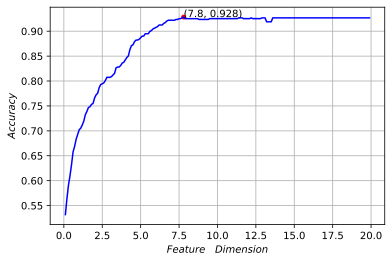

In [21]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
percentilenumber =  np.arange(start=0.1,stop=20,step=0.1)
percentilenumber.shape = [199,1]
max_index=np.argmax(scorelist)
plt.plot(percentilenumber[max_index],scorelist[max_index],'.r',markersize=8)
plt.text(percentilenumber[max_index],scorelist[max_index],(percentilenumber[max_index][0],(np.around(scorelist[max_index],decimals=3))))
plt.plot(percentilenumber,scorelist,'b',markeredgecolor='k')
ax = plt.gca()
ax.set_xlabel('$\it{Feature\quadDimension}$') 
ax.set_ylabel('$\it{Accuracy}$') 
ax.grid()
# plt.savefig('C:/Users/Jensen Wang/Desktop/Supp/HSapiensFeatureNumSeleted.eps',dpi=600,format='eps',bbox_inches='tight')
plt.show()

In [22]:
print('The selected feature numbers are: {}'.format(featurenumber[max_index]))
from sklearn.feature_selection import SelectPercentile,chi2
selector = SelectPercentile(chi2,percentile=percentilenumber[max_index])
features_selected = selector.fit_transform(SCerevisiaeScaled,TargetSCerevisiae)
print(features_selected.shape)

The selected feature numbers are: 992
(628, 992)


In [23]:
from sklearn.feature_selection import SelectPercentile,chi2
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import math
Indept2scorelist = []
Indept2featurenumber = []
IndeptSCerevisiaeScaledshape = IndeptSCerevisiaeScaled.shape
for i in np.arange(start=0.1,stop=20,step=0.1):
    selector = SelectPercentile(chi2,percentile=i)
    Indept2features_selected = selector.fit_transform(IndeptSCerevisiaeScaled,IndeptTargetSCerevisiae)
    print(Indept2features_selected.shape)
    Indept2featurenumber.append(Indept2features_selected.shape[1])
    clf = LogisticRegression(random_state=1)
    Indept2scores = cross_val_score(clf,Indept2features_selected,IndeptTargetSCerevisiae,cv=5)
    print('The test accuracy scores are: {} \n'.format(Indept2scores))
    print('The mean test accuracy scores are: {} \n'.format(np.mean(Indept2scores)))
    Indept2scorelist.extend([np.mean(Indept2scores)])

(200, 3)
The test accuracy scores are: [0.5   0.525 0.675 0.55  0.525] 

The mean test accuracy scores are: 0.5549999999999999 

(200, 7)
The test accuracy scores are: [0.5   0.525 0.675 0.55  0.525] 

The mean test accuracy scores are: 0.5549999999999999 

(200, 11)
The test accuracy scores are: [0.5   0.525 0.675 0.55  0.525] 

The mean test accuracy scores are: 0.5549999999999999 

(200, 15)
The test accuracy scores are: [0.5   0.575 0.675 0.55  0.6  ] 

The mean test accuracy scores are: 0.58 

(200, 19)
The test accuracy scores are: [0.5   0.575 0.675 0.55  0.6  ] 

The mean test accuracy scores are: 0.58 

(200, 23)
The test accuracy scores are: [0.5   0.575 0.675 0.55  0.6  ] 

The mean test accuracy scores are: 0.58 

(200, 27)
The test accuracy scores are: [0.5   0.575 0.675 0.55  0.6  ] 

The mean test accuracy scores are: 0.58 

(200, 31)
The test accuracy scores are: [0.5   0.575 0.675 0.55  0.6  ] 

The mean test accuracy scores are: 0.58 

(200, 35)
The test accuracy scor

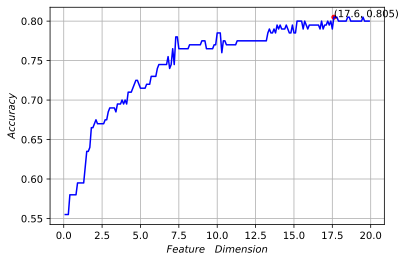

In [24]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
percentilenumber =  np.arange(start=0.1,stop=20,step=0.1)
percentilenumber.shape = [199,1]
max_index=np.argmax(Indept2scorelist)
plt.plot(percentilenumber[max_index], Indept2scorelist[max_index],'.r',markersize=8)
plt.text(percentilenumber[max_index], Indept2scorelist[max_index],(percentilenumber[max_index][0],(np.around(Indept2scorelist[max_index],decimals=3))))
plt.plot(percentilenumber,Indept2scorelist,'b',markeredgecolor='k')
ax = plt.gca()
ax.set_xlabel('$\it{Feature\quadDimension}$') 
ax.set_ylabel('$\it{Accuracy}$') 
ax.grid()
# plt.savefig('C:/Users/Jensen Wang/Desktop/Supp/IndetpHSapiensFeatureseleted.eps',dpi=900,format='eps',bbox_inches='tight')
plt.show()

In [25]:
print('The selected feature numbers are: {}'.format(Indept2featurenumber[max_index]))
selector = SelectPercentile(chi2,percentile=17.6)
Indept2features_selected = selector.fit_transform(IndeptSCerevisiaeScaled,IndeptTargetSCerevisiae)

The selected feature numbers are: 697


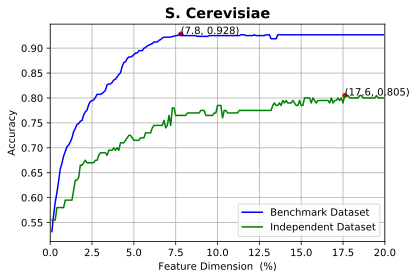

In [29]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
percentilenumber =  np.arange(start=0.1,stop=20,step=0.1)
percentilenumber.shape = [199,1]
SCerevisiaemax_index=np.argmax(scorelist)
Indept2max_index=np.argmax(Indept2scorelist)
plt.plot(percentilenumber[SCerevisiaemax_index],scorelist[SCerevisiaemax_index],'.r',markersize=8)
plt.text(percentilenumber[SCerevisiaemax_index],scorelist[SCerevisiaemax_index],(percentilenumber[SCerevisiaemax_index][0],(np.around(scorelist[SCerevisiaemax_index],decimals=3))))
plt.plot(percentilenumber,scorelist,'b',markeredgecolor='k',label='Benchmark Dataset')
plt.plot(percentilenumber[Indept2max_index], Indept2scorelist[Indept2max_index],'.r',markersize=8)
plt.text(percentilenumber[Indept2max_index], Indept2scorelist[Indept2max_index],(percentilenumber[Indept2max_index][0],(np.around(Indept2scorelist[Indept2max_index],decimals=3))))
plt.plot(percentilenumber,Indept2scorelist,'g',markeredgecolor='k',label='Independent Dataset')
ax = plt.gca()
plt.xlim(0,20)
ax.set_xlabel('Feature Dimension  (%)') 
ax.set_ylabel('Accuracy') 
ax.grid()
plt.legend()
plt.title('S. Cerevisiae',fontsize='x-large',fontweight='heavy')
plt.savefig('C:/Users/Jensen Wang/Desktop/Supp/SCerevisiaeFeatureNumSeleted.svg',dpi=1200,format='svg',bbox_inches='tight')
plt.show()

## S.Cerevisiae SVM

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {"C":[pow(2, k) for k in range(-5, 15)],"gamma":[pow(2, k) for k in range(-15, 5)]}
clf = SVC(kernel='rbf',random_state=1)
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
grid_search.fit(features_selected,TargetSCerevisiae)
print('SVM model selected : \n')
print('-------------------------------------')
print('The best params is:{}\n'.format(grid_search.best_params_))
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))
print('-------------------------------------')

SVM model selected : 

-------------------------------------
The best params is:{'C': 256, 'gamma': 0.000244140625}

The best test score is:0.9332

-------------------------------------


## S.Cerevisiae RandomForest

In [54]:
clf = RandomForestClassifier(random_state=1,criterion='gini')
param_grid = {}
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,TargetSCerevisiae)
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))

The best test score is:0.9929



In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {"n_estimators":[i for i in range(10,160,10)]}
clf = RandomForestClassifier(random_state=1,criterion='gini',verbose=1)
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,TargetSCerevisiae)
print('RandomForest model selected : \n')
print('-------------------------------------')
print('The best params is:{}\n'.format(grid_search.best_params_))
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))
print('-------------------------------------')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForest model selected : 

-------------------------------------
The best params is:{'n_estimators': 150}

The best test score is:0.9933

-------------------------------------


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {"max_features":[i for i in range(10,110,10)]}
clf = RandomForestClassifier(random_state=1,criterion='gini',n_estimators=150,oob_score=True)
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,TargetSCerevisiae)
print('RandomForest model selected : \n')
print('-------------------------------------')
print('The best params is:{}\n'.format(grid_search.best_params_))
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))
print('-------------------------------------')

RandomForest model selected : 

-------------------------------------
The best params is:{'max_features': 20}

The best test score is:0.9935

-------------------------------------


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {"max_depth":[i for i in range(10,110,10)],"min_samples_split":[i for i in (2,11)]}
clf = RandomForestClassifier(random_state=1,criterion='gini',n_estimators=150,max_features=20,oob_score=True)
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,TargetSCerevisiae)
print('RandomForest model selected : \n')
print('-------------------------------------')
print('The best params is:{}\n'.format(grid_search.best_params_))
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))
print('-------------------------------------')

RandomForest model selected : 

-------------------------------------
The best params is:{'max_depth': 100, 'min_samples_split': 2}

The best test score is:0.9926

-------------------------------------


## S.Cerevisiae PassiveAgressive

In [59]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier(random_state=1)
param_grid = {}
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,TargetSCerevisiae)
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))

The best test score is:0.9896



In [61]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier(random_state=1)
param_grid = {'C':[i for i in np.linspace(start=0.001,stop=100,num=10000,endpoint=True,dtype=float)]}
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,TargetSCerevisiae)
print('The best params is:{}\n'.format(grid_search.best_params_))
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))

The best params is:{'C': 0.001}

The best test score is:0.9935



In [62]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier(C=0.001,random_state=1)
param_grid = {'fit_intercept':[True,False],'loss':['hinge','squared_hinge']}
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,TargetSCerevisiae)
print('The best params is:{}\n'.format(grid_search.best_params_))
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))

The best params is:{'fit_intercept': True, 'loss': 'hinge'}

The best test score is:0.9935



In [30]:
rfS0 = RandomForestclf(n_estimators=150,max_features=20,min_samples_split=2,max_depth=None)
acc_rfS0,mcc_rfS0,sn_rfS0,sp_rfS0,auroc_rfS0,mean_fpr_rfS0,mean_tpr_rfS0 = KfoldEvaluate(rfS0,features_selected,TargetSCerevisiae)
print('Acc is {} .'.format(acc_rfS0))
print('Mcc is {} .'.format(mcc_rfS0))
print('Sn is {} .'.format(sn_rfS0))
print('Sp is {} .'.format(sp_rfS0))
print('Auroc is {} .'.format(auroc_rfS0))

acc_rfS1,mcc_rfS1,sn_rfS1,sp_rfS1,auroc_rfS1,mean_fpr_rfS1,mean_tpr_rfS1 = KfoldEvaluate(rfS0,Indept2features_selected,IndeptTargetSCerevisiae)
print('Acc is {} .'.format(acc_rfS1))
print('Mcc is {} .'.format(mcc_rfS1))
print('Sn is {} .'.format(sn_rfS1))
print('Sp is {} .'.format(sp_rfS1))
print('Auroc is {} .'.format(auroc_rfS1))

acc_rfS0loo,mcc_rfS0loo,sn_rfS0loo,sp_rfS0loo,auroc_rfS0loo,mean_fpr_rfS0loo,mean_tpr_rfS0loo = LooEvaluate(rfS0,features_selected,TargetSCerevisiae)
print('Acc is {} .'.format(acc_rfS0loo))
print('Mcc is {} .'.format(mcc_rfS0loo))
print('Sn is {} .'.format(sn_rfS0loo))
print('Sp is {} .'.format(sp_rfS0loo))
print('Auroc is {} .'.format(auroc_rfS0loo))

acc_rfS1loo,mcc_rfS1loo,sn_rfS1loo,sp_rfS1loo,auroc_rfS1loo,mean_fpr_rfS1loo,mean_tpr_rfS1loo = LooEvaluate(rfS0,Indept2features_selected,IndeptTargetSCerevisiae)
print('Acc is {} .'.format(acc_rfS1loo))
print('Mcc is {} .'.format(mcc_rfS1loo))
print('Sn is {} .'.format(sn_rfS1loo))
print('Sp is {} .'.format(sp_rfS1loo))
print('Auroc is {} .'.format(auroc_rfS1loo))

svmS0 = svm(C=256,gamma=0.000244140625)
acc_svmS0,mcc_svmS0,sn_svmS0,sp_svmS0,auroc_svmS0,mean_fpr_svmS0,mean_tpr_svmS0 = KfoldEvaluate(svmS0,features_selected,TargetSCerevisiae)
print('Acc is {} .'.format(acc_svmS0))
print('Mcc is {} .'.format(mcc_svmS0))
print('Sn is {} .'.format(sn_svmS0))
print('Sp is {} .'.format(sp_svmS0))
print('Auroc is {} .'.format(auroc_svmS0))

acc_svmS1,mcc_svmS1,sn_svmS1,sp_svmS1,auroc_svmS1,mean_fpr_svmS1,mean_tpr_svmS1 = KfoldEvaluate(svmS0,Indept2features_selected,IndeptTargetSCerevisiae)
print('Acc is {} .'.format(acc_svmS1))
print('Mcc is {} .'.format(mcc_svmS1))
print('Sn is {} .'.format(sn_svmS1))
print('Sp is {} .'.format(sp_svmS1))
print('Auroc is {} .'.format(auroc_svmS1))

Acc is 0.8710445468509984 .
Mcc is 0.7682141300508942 .
Sn is 0.7424522506356123 .
Sp is 1.0 .
Auroc is 0.9857312064703163 .
Acc is 0.7150000000000001 .
Mcc is 0.4915675770990105 .
Sn is 0.9095154845154847 .
Sp is 0.5565476190476191 .
Auroc is 0.8659346986187217 .
Acc is 0.8821656050955414 .
Mcc is 0.7864837576396144 .
Sn is 0.7643312101910829 .
Sp is 1.0 .
Auroc is 0.984556540665109 .
Acc is 0.725 .
Mcc is 0.4933747866782648 .
Sn is 0.93 .
Sp is 0.52 .
Auroc is 0.8708466957905104 .
Acc is 0.9172043010752688 .
Mcc is 0.8481480908573008 .
Sn is 0.8528994039350575 .
Sp is 0.9891891891891891 .
Auroc is 0.9872307534719794 .
Acc is 0.745 .
Mcc is 0.5534728379959125 .
Sn is 0.4770979020979021 .
Sp is 1.0 .
Auroc is 0.9660301507537689 .


## S.Cerevisiae ROC

C:\downloadware\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


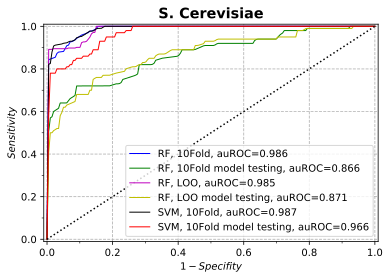

In [31]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from matplotlib.ticker import MultipleLocator
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
p1 = plt.plot(mean_fpr_rfS0,mean_tpr_rfS0,linewidth=1,c='b')
p2 = plt.plot(mean_fpr_rfS1,mean_tpr_rfS1,linewidth=1,c='g')
p3= plt.plot(mean_fpr_rfS0loo,mean_tpr_rfS0loo,linewidth=1,c='m')
p4 = plt.plot(mean_fpr_rfS1loo,mean_tpr_rfS1loo,linewidth=1,c='y')
p5 = plt.plot(mean_fpr_svmS0,mean_tpr_svmS0,linewidth=1,c='k')
p6 = plt.plot(mean_fpr_svmS1,mean_tpr_svmS1,linewidth=1,c='r')
plt.legend([p1,p2,p3,p4,p5,p6],labels=['RF, 10Fold, auROC=0.986','RF, 10Fold model testing, auROC=0.866','RF, LOO, auROC=0.985','RF, LOO model testing, auROC=0.871','SVM, 10Fold, auROC=0.987','SVM, 10Fold model testing, auROC=0.966'],
          loc='lower right')
plt.title('S. Cerevisiae',fontsize='x-large',fontweight='heavy')
x = np.linspace(0,1,200)
y = np.linspace(0,1,200)
plt.plot(x,y,':k')
ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True,which='major',axis='both',linestyle='--')
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)
plt.xlabel('$\it{1-Specifity }$')
plt.ylabel('$\it{Sensitivity}$')
plt.savefig('C:/Users/Jensen Wang/Desktop/Supp/SCerevisiaeROCcurve.svg',dpi=1200,format='svg',bbox_inches='tight')
plt.show()

In [32]:
PAclfS0 = PAclf(C=0.001,fit_intercept=True,loss='hinge')
acc_PAclfS0,mcc_PAclfS0,sn_PAclfS0,sp_PAclfS0,auroc_PAclfS0,mean_fpr_PAclfS0,mean_tpr_PAclfS0 = KfoldEvaluate(PAclfS0,features_selected,TargetSCerevisiae)
print('Acc is {} .'.format(acc_PAclfS0))
print('Mcc is {} .'.format(mcc_PAclfS0))
print('Sn is {} .'.format(sn_PAclfS0))
print('Sp is {} .'.format(sp_PAclfS0))
print('Auroc is {} .'.format(auroc_PAclfS0))

acc_PAclfS1,mcc_PAclfS1,sn_PAclfS1,sp_PAclfS1,auroc_PAclfS1,mean_fpr_PAclfS1,mean_tpr_PAclfS1 = KfoldEvaluate(PAclfS0,Indept2features_selected,IndeptTargetSCerevisiae)
print('Acc is {} .'.format(acc_PAclfH1))
print('Mcc is {} .'.format(mcc_PAclfH1))
print('Sn is {} .'.format(sn_PAclfH1))
print('Sp is {} .'.format(sp_PAclfH1))
print('Auroc is {} .'.format(auroc_PAclfH1))

acc_PAclfS0loo,mcc_PAclfS0loo,sn_PAclfS0loo,sp_PAclfS0loo,auroc_PAclfS0loo,mean_fpr_PAclfS0loo,mean_tpr_PAclfS0loo = LooEvaluate(PAclfS0,features_selected,TargetSCerevisiae)
print('Acc is {} .'.format(acc_PAclfS0loo))
print('Mcc is {} .'.format(mcc_PAclfS0loo))
print('Sn is {} .'.format(sn_PAclfS0loo))
print('Sp is {} .'.format(sp_PAclfS0loo))
print('Auroc is {} .'.format(auroc_PAclfS0loo))

acc_PAclfS1loo,mcc_PAclfS1loo,sn_PAclfS1loo,sp_PAclfS1loo,auroc_PAclfS1loo,mean_fpr_PAclfS1loo,mean_tpr_PAclfS1loo = LooEvaluate(PAclfS0,Indept2features_selected,IndeptTargetSCerevisiae)
print('Acc is {} .'.format(acc_PAclfS1loo))
print('Mcc is {} .'.format(mcc_PAclfS1loo))
print('Sn is {} .'.format(sn_PAclfS1loo))
print('Sp is {} .'.format(sp_PAclfS1loo))
print('Auroc is {} .'.format(auroc_PAclfS1loo))

Acc is 0.9395033282130058 .
Mcc is 0.8866301186392791 .
Sn is 0.9409992723744847 .
Sp is 0.9423274979524979 .
Auroc is 0.9912078145817338 .
Acc is 0.8099999999999999 .
Mcc is 0.68667778228947 .
Sn is 0.6544497169497171 .
Sp is 1.0 .
Auroc is 0.8920400999974748 .
Acc is 0.9299363057324841 .
Mcc is 0.8605012244563413 .
Sn is 0.9490445859872612 .
Sp is 0.910828025477707 .
Auroc is 0.99225426495535 .
Acc is 0.915 .
Mcc is 0.8333820599391434 .
Sn is 0.87 .
Sp is 0.96 .
Auroc is 0.977889447236181 .


C:\downloadware\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  if sys.path[0] == '':


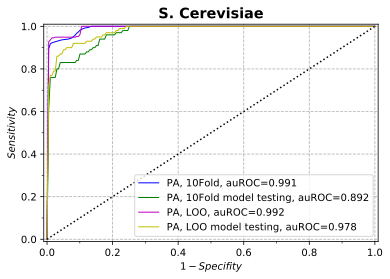

In [33]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from matplotlib.ticker import MultipleLocator
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
p1 = plt.plot(mean_fpr_PAclfS0,mean_tpr_PAclfS0,linewidth=1,c='b')
p2 = plt.plot(mean_fpr_PAclfS1,mean_tpr_PAclfS1,linewidth=1,c='g')
p3= plt.plot(mean_fpr_PAclfS0loo,mean_tpr_PAclfS0loo,linewidth=1,c='m')
p4 = plt.plot(mean_fpr_PAclfS1loo,mean_tpr_PAclfS1loo,linewidth=1,c='y')
plt.legend([p1,p2,p3,p4],labels=['PA, 10Fold, auROC=0.991','PA, 10Fold model testing, auROC=0.892','PA, LOO, auROC=0.992','PA, LOO model testing, auROC=0.978'],
          loc='lower right')
plt.title('S. Cerevisiae',fontsize='x-large',fontweight='heavy')
x = np.linspace(0,1,200)
y = np.linspace(0,1,200)
plt.plot(x,y,':k')
ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True,which='major',axis='both',linestyle='--')
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)
plt.xlabel('$\it{1-Specifity }$')
plt.ylabel('$\it{Sensitivity}$')
plt.savefig('C:/Users/Jensen Wang/Desktop/Supp/SCerevisiaePAclfROCcurve.svg',dpi=1200,format='svg',bbox_inches='tight')
plt.show()

### S .Cerevisiae Without Feature Selected

In [13]:
PAclfS0 = PAclf(C=0.001,fit_intercept=True,loss='hinge')
acc_PAclfS0o_loo,mcc_PAclfS0o_loo,sn_PAclfS0o_loo,sp_PAclfS0o_loo,auroc_PAclfS0o_loo,mean_fpr_PAclfS0o_loo,mean_tpr_PAclfS0o_loo = LooEvaluate(PAclfS0,SCerevisiaeScaled,TargetSCerevisiae)
print('Acc is {} .'.format(acc_PAclfS0o_loo))
print('Mcc is {} .'.format(mcc_PAclfS0o_loo))
print('Sn is {} .'.format(sn_PAclfS0o_loo))
print('Sp is {} .'.format(sp_PAclfS0o_loo))
print('Auroc is {} .'.format(auroc_PAclfS0o_loo))

acc_PAclfS1o_loo,mcc_PAclfS1o_loo,sn_PAclfS1o_loo,sp_PAclfS1o_loo,auroc_PAclfS1o_loo,mean_fpr_PAclfS1o_loo,mean_tpr_PAclfS1o_loo = LooEvaluate(PAclfS0,IndeptSCerevisiaeScaled,IndeptTargetSCerevisiae)
print('Acc is {} .'.format(acc_PAclfS1o_loo))
print('Mcc is {} .'.format(mcc_PAclfS1o_loo))
print('Sn is {} .'.format(sn_PAclfS1o_loo))
print('Sp is {} .'.format(sp_PAclfS1o_loo))
print('Auroc is {} .'.format(auroc_PAclfS1o_loo))

Acc is 0.5987261146496815 .
Mcc is 0.1975524374996504 .
Sn is 0.5828025477707006 .
Sp is 0.6146496815286624 .
Auroc is 0.6391831770316551 .
Acc is 0.785 .
Mcc is 0.5830000941162125 .
Sn is 0.68 .
Sp is 0.89 .
Auroc is 0.8708040201005025 .


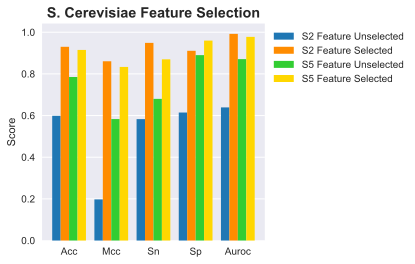

In [8]:
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn')
fig = plt.figure(figsize=(4,4))
plt.title('S. Cerevisiae Feature Selection',fontsize='x-large',fontweight='heavy')
barwith = 0.2
x = np.arange(5)
ySo = [0.5987261146496815,0.1975524374996504,0.5828025477707006,0.6146496815286624,0.6391831770316551]
ySindepto = [0.785,0.5830000941162125,0.68,0.89,0.8708040201005025]
yS = [0.9299363057324841,0.8605012244563413,0.9490445859872612,0.910828025477707,0.99225426495535]
ySindept = [0.915,0.8333820599391434,0.87,0.96,0.977889447236181]
plt.bar(x=x,height=ySo,width=barwith,color='tab:blue',align='center',label='S2 Feature Unselected')
plt.bar(x=x+barwith,height=yS,width=barwith,color='darkorange',align='center',label='S2 Feature Selected')
plt.bar(x=x+barwith*2,height=ySindepto,width=barwith,color='limegreen',align='center',label='S5 Feature Unselected')
plt.bar(x=x+barwith*3,height=ySindept,width=barwith,color='gold',align='center',label='S5 Feature Selected')
tick_label=['Acc','Mcc','Sn','Sp','Auroc']
plt.xticks(x+barwith*1.5,tick_label)
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.grid(axis='x')
ax = plt.gca()
plt.show()
fig.savefig('C:/Users/Jensen Wang/Desktop/Supp/SCerevisiaeComparison.eps',dpi=1200,format='eps',bbox_inches='tight')

# M. musculus

In [16]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
MMusculusFeatures = np.load('C:/Users/Jensen Wang/Desktop/Supp/MMusculusFeatures.npy')
MMusculusScaled = MinMaxScaler().fit_transform(MMusculusFeatures)
print(MMusculusScaled.shape)
TargetMMusculus = np.load("C:/Users/Jensen Wang/Desktop/Supp/TargetMMusculus.npy")
print(TargetMMusculus.shape)

(944, 11232)
(944,)


In [5]:
from sklearn.feature_selection import SelectPercentile,chi2
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import math
scorelist = []
featurenumber = []
MMusculusScaledshape = MMusculusScaled.shape
for i in np.arange(start=0.1,stop=20,step=0.1):
    selector = SelectPercentile(chi2,percentile=i)
    features_selected = selector.fit_transform(MMusculusScaled,TargetMMusculus)
    print(features_selected.shape)
    featurenumber.append(features_selected.shape[1])
    clf = LogisticRegression(random_state=1)
    scores = cross_val_score(clf,features_selected,TargetMMusculus,cv=5)
    print('The test accuracy scores are: {} \n'.format(scores))
    print('The mean test accuracy scores are: {} \n'.format(np.mean(scores)))
    scorelist.extend([np.mean(scores)])

(944, 11)
The test accuracy scores are: [0.50793651 0.51851852 0.50793651 0.5026455  0.51595745] 

The mean test accuracy scores are: 0.5105988967691095 

(944, 22)
The test accuracy scores are: [0.53968254 0.52910053 0.52380952 0.51322751 0.54255319] 

The mean test accuracy scores are: 0.5296746594618935 

(944, 33)
The test accuracy scores are: [0.54497354 0.54497354 0.52910053 0.52910053 0.55319149] 

The mean test accuracy scores are: 0.5402679275019701 

(944, 44)
The test accuracy scores are: [0.58730159 0.56084656 0.55555556 0.56084656 0.60106383] 

The mean test accuracy scores are: 0.5731228188674997 

(944, 56)
The test accuracy scores are: [0.60846561 0.57142857 0.58201058 0.57671958 0.59574468] 

The mean test accuracy scores are: 0.5868738038950805 

(944, 67)
The test accuracy scores are: [0.61904762 0.57142857 0.58201058 0.57671958 0.60106383] 

The mean test accuracy scores are: 0.5900540357987166 

(944, 78)
The test accuracy scores are: [0.62962963 0.57671958 0.58201

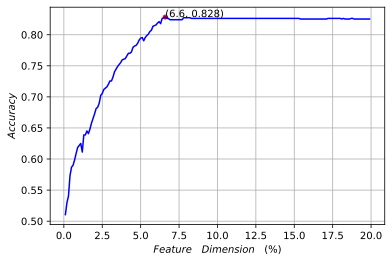

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
percentilenumber =  np.arange(start=0.1,stop=20,step=0.1)
percentilenumber.shape = [199,1]
max_index=np.argmax(scorelist)
plt.plot(percentilenumber[max_index],scorelist[max_index],'.r',markersize=8)
plt.text(percentilenumber[max_index],scorelist[max_index],(percentilenumber[max_index][0],(np.around(scorelist[max_index],decimals=3))))
plt.plot(percentilenumber,scorelist,'b',markeredgecolor='k')
ax = plt.gca()
ax.set_xlabel('$\it{Feature\quadDimension}$   (%)') 
ax.set_ylabel('$\it{Accuracy}$') 
ax.grid()
plt.show()

In [7]:
print('The selected feature numbers are: {}'.format(featurenumber[max_index]))
from sklearn.feature_selection import SelectPercentile,chi2
selector = SelectPercentile(chi2,percentile=percentilenumber[max_index])
features_selected = selector.fit_transform(MMusculusScaled,TargetMMusculus)
print(features_selected.shape)

The selected feature numbers are: 741
(944, 741)


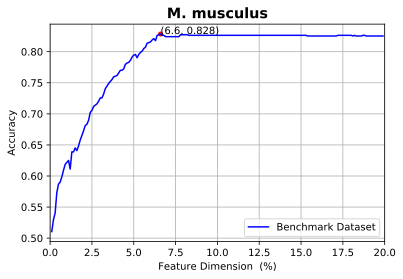

In [8]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
percentilenumber =  np.arange(start=0.1,stop=20,step=0.1)
percentilenumber.shape = [199,1]
MMusculusmax_index=np.argmax(scorelist)
plt.plot(percentilenumber[MMusculusmax_index],scorelist[MMusculusmax_index],'.r',markersize=8)
plt.text(percentilenumber[MMusculusmax_index],scorelist[MMusculusmax_index],(percentilenumber[MMusculusmax_index][0],(np.around(scorelist[MMusculusmax_index],decimals=3))))
plt.plot(percentilenumber,scorelist,'b',markeredgecolor='k',label='Benchmark Dataset')
ax = plt.gca()
plt.xlim(0,20)
ax.set_xlabel('Feature Dimension  (%)') 
ax.set_ylabel('Accuracy') 
ax.grid()
plt.legend(loc='lower right')
plt.title('M. musculus',fontsize='x-large',fontweight='heavy')
plt.savefig('C:/Users/Jensen Wang/Desktop/Supp/MMusculusFeatureNumSeleted.svg',dpi=1200,format='svg',bbox_inches='tight')
plt.show()

## M. Musculus SVM

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {"C":[pow(2, k) for k in range(-5, 15)],"gamma":[pow(2, k) for k in range(-15, 5)]}
clf = SVC(kernel='rbf',random_state=1)
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
grid_search.fit(features_selected,TargetMMusculus)
print('SVM model selected : \n')
print('-------------------------------------')
print('The best params is:{}\n'.format(grid_search.best_params_))
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))
print('-------------------------------------')

SVM model selected : 

-------------------------------------
The best params is:{'C': 8, 'gamma': 0.0078125}

The best test score is:0.8432

-------------------------------------


## M. Musculus RandomForest

In [48]:
clf = RandomForestClassifier(random_state=1,criterion='gini')
param_grid = {}
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,TargetMMusculus)
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))

The best test score is:0.9526



In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {"n_estimators":[i for i in range(10,160,10)]}
clf = RandomForestClassifier(random_state=1,criterion='gini')
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,TargetMMusculus)
print('RandomForest model selected : \n')
print('-------------------------------------')
print('The best params is:{}\n'.format(grid_search.best_params_))
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))
print('-------------------------------------')

RandomForest model selected : 

-------------------------------------
The best params is:{'n_estimators': 120}

The best test score is:0.9532

-------------------------------------


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {"max_features":[i for i in range(10,110,10)]}
clf = RandomForestClassifier(random_state=1,criterion='gini',n_estimators=120,oob_score=True)
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,TargetMMusculus)
print('RandomForest model selected : \n')
print('-------------------------------------')
print('The best params is:{}\n'.format(grid_search.best_params_))
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))
print('-------------------------------------')

RandomForest model selected : 

-------------------------------------
The best params is:{'max_features': 10}

The best test score is:0.9535

-------------------------------------


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {"max_depth":[i for i in range(10,110,10)],"min_samples_split":[i for i in (2,11)]}
clf = RandomForestClassifier(random_state=1,criterion='gini',n_estimators=120,max_features=10,oob_score=True)
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,TargetMMusculus)
print('RandomForest model selected : \n')
print('-------------------------------------')
print('The best params is:{}\n'.format(grid_search.best_params_))
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))
print('-------------------------------------')

RandomForest model selected : 

-------------------------------------
The best params is:{'max_depth': 100, 'min_samples_split': 2}

The best test score is:0.9524

-------------------------------------


## M. Musculus PassiveAggressive

In [53]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier(random_state=1)
param_grid = {}
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,TargetMMusculus)
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))

The best test score is:0.9446



In [54]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier(random_state=1)
param_grid = {'C':[i for i in np.linspace(start=0.001,stop=100,num=10000,endpoint=True,dtype=float)]}
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,TargetMMusculus)
print('The best params is:{}\n'.format(grid_search.best_params_))
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))

The best params is:{'C': 0.31102790279027903}

The best test score is:0.9537



In [56]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier(C=0.31102790279027903,random_state=1)
param_grid = {'fit_intercept':[False,True],'loss':['squared_hinge','hinge']}
grid_search = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(features_selected,TargetMMusculus)
print('The best params is:{}\n'.format(grid_search.best_params_))
print('The best test score is:{:.4f}\n'.format(grid_search.best_score_))

The best params is:{'fit_intercept': True, 'loss': 'hinge'}

The best test score is:0.9537



In [57]:
rfM0 = RandomForestclf(n_estimators=120,max_features=10,min_samples_split=2,max_depth=None)
acc_rfM0,mcc_rfM0,sn_rfM0,sp_rfM0,auroc_rfM0,mean_fpr_rfM0,mean_tpr_rfM0 = KfoldEvaluate(rfM0,features_selected,TargetMMusculus)
print('Acc is {} .'.format(acc_rfM0))
print('Mcc is {} .'.format(mcc_rfM0))
print('Sn is {} .'.format(sn_rfM0))
print('Sp is {} .'.format(sp_rfM0))
print('Auroc is {} .'.format(auroc_rfM0))

acc_rfM0loo,mcc_rfM0loo,sn_rfM0loo,sp_rfM0loo,auroc_rfM0loo,mean_fpr_rfM0loo,mean_tpr_rfM0loo = LooEvaluate(rfM0,features_selected,TargetMMusculus)
print('Acc is {} .'.format(acc_rfM0loo))
print('Mcc is {} .'.format(mcc_rfM0loo))
print('Sn is {} .'.format(sn_rfM0loo))
print('Sp is {} .'.format(sp_rfM0loo))
print('Auroc is {} .'.format(auroc_rfM0loo))

svmM0 = svm(C=8,gamma=0.0078125)
acc_svmM0,mcc_svmM0,sn_svmM0,sp_svmM0,auroc_svmM0,mean_fpr_svmM0,mean_tpr_svmM0 = KfoldEvaluate(svmM0,features_selected,TargetMMusculus)
print('Acc is {} .'.format(acc_svmM0))
print('Mcc is {} .'.format(mcc_svmM0))
print('Sn is {} .'.format(sn_svmM0))
print('Sp is {} .'.format(sp_svmM0))
print('Auroc is {} .'.format(auroc_svmM0))

acc_svmM0loo,mcc_svmM0loo,sn_svmM0loo,sp_svmM0loo,auroc_svmM0loo,mean_fpr_svmM0loo,mean_tpr_svmM0loo = LooEvaluate(svmM0,features_selected,TargetMMusculus)
print('Acc is {} .'.format(acc_svmM0loo))
print('Mcc is {} .'.format(mcc_svmM0loo))
print('Sn is {} .'.format(sn_svmM0loo))
print('Sp is {} .'.format(sp_svmM0loo))
print('Auroc is {} .'.format(auroc_svmM0loo))

Acc is 0.8442441209406496 .
Mcc is 0.7226793128947642 .
Sn is 0.9981481481481481 .
Sp is 0.6892741963309466 .
Auroc is 0.9452864394999584 .
Acc is 0.8675847457627118 .
Mcc is 0.7623906682195649 .
Sn is 1.0 .
Sp is 0.7351694915254238 .
Auroc is 0.961949578400477 .
Acc is 0.7487010078387457 .
Mcc is 0.5920747738628838 .
Sn is 0.7503404950237248 .
Sp is 0.784331563515936 .
Auroc is 0.8351168209900757 .
Acc is 0.7341101694915254 .
Mcc is 0.46824661217530994 .
Sn is 0.7288135593220338 .
Sp is 0.739406779661017 .
Auroc is 0.9279873946001191 .


C:\downloadware\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  if sys.path[0] == '':


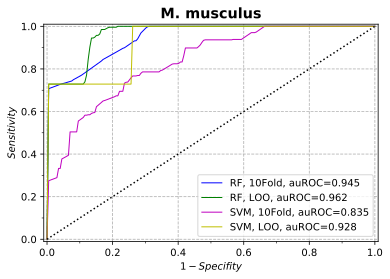

In [60]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from matplotlib.ticker import MultipleLocator
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
p1 = plt.plot(mean_fpr_rfM0,mean_tpr_rfM0,linewidth=1,c='b')
p2 = plt.plot(mean_fpr_rfM0loo,mean_tpr_rfM0loo,linewidth=1,c='g')
p3= plt.plot(mean_fpr_svmM0,mean_tpr_svmM0,linewidth=1,c='m')
p4 = plt.plot(mean_fpr_svmM0loo,mean_tpr_svmM0loo,linewidth=1,c='y')
plt.legend([p1,p2,p3,p4,p5,p6],labels=['RF, 10Fold, auROC=0.945','RF, LOO, auROC=0.962',
                                       'SVM, 10Fold, auROC=0.835','SVM, LOO, auROC=0.928'],loc='lower right')
plt.title('M. musculus',fontsize='x-large',fontweight='heavy')
x = np.linspace(0,1,200)
y = np.linspace(0,1,200)
plt.plot(x,y,':k')
ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True,which='major',axis='both',linestyle='--')
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)
plt.xlabel('$\it{1-Specifity }$')
plt.ylabel('$\it{Sensitivity}$')
plt.savefig('C:/Users/Jensen Wang/Desktop/Supp/MMusculusROCcurve.svg',dpi=1200,format='svg',bbox_inches='tight')
plt.show()

In [10]:
PAclfM0 = PAclf(C=0.311,fit_intercept=True,loss='hinge')
acc_PAclfM0,mcc_PAclfM0,sn_PAclfM0,sp_PAclfM0,auroc_PAclfM0,mean_fpr_PAclfM0,mean_tpr_PAclfM0 = KfoldEvaluate(PAclfM0,features_selected,TargetMMusculus)
print('Acc is {} .'.format(acc_PAclfM0))
print('Mcc is {} .'.format(mcc_PAclfM0))
print('Sn is {} .'.format(sn_PAclfM0))
print('Sp is {} .'.format(sp_PAclfM0))
print('Auroc is {} .'.format(auroc_PAclfM0))

acc_PAclfM0loo,mcc_PAclfM0loo,sn_PAclfM0loo,sp_PAclfM0loo,auroc_PAclfM0loo,mean_fpr_PAclfM0loo,mean_tpr_PAclfM0loo = LooEvaluate(PAclfM0,features_selected,TargetMMusculus)
print('Acc is {} .'.format(acc_PAclfM0loo))
print('Mcc is {} .'.format(mcc_PAclfM0loo))
print('Sn is {} .'.format(sn_PAclfM0loo))
print('Sp is {} .'.format(sp_PAclfM0loo))
print('Auroc is {} .'.format(auroc_PAclfM0loo))

Acc is 0.8453975363941769 .
Mcc is 0.725966921242035 .
Sn is 0.6944247730180729 .
Sp is 0.998 .
Auroc is 0.9556891554434803 .
Acc is 0.8622881355932204 .
Mcc is 0.7527855249084083 .
Sn is 0.7266949152542372 .
Sp is 0.9978813559322034 .
Auroc is 0.9501855449217131 .


C:\downloadware\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  # Remove the CWD from sys.path while we load stuff.


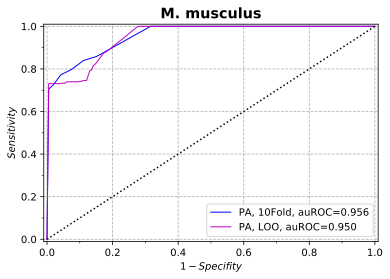

In [11]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from matplotlib.ticker import MultipleLocator
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
p1 = plt.plot(mean_fpr_PAclfM0,mean_tpr_PAclfM0,linewidth=1,c='b')
p2= plt.plot(mean_fpr_PAclfM0loo,mean_tpr_PAclfM0loo,linewidth=1,c='m')
plt.legend([p1,p2],labels=['PA, 10Fold, auROC=0.956','PA, LOO, auROC=0.950'],
          loc='lower right')
plt.title('M. musculus',fontsize='x-large',fontweight='heavy')
x = np.linspace(0,1,200)
y = np.linspace(0,1,200)
plt.plot(x,y,':k')
ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True,which='major',axis='both',linestyle='--')
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)
plt.xlabel('$\it{1-Specifity }$')
plt.ylabel('$\it{Sensitivity}$')
plt.savefig('C:/Users/Jensen Wang/Desktop/Supp/MMusculusPAclfROCcurve.svg',dpi=1200,format='svg',bbox_inches='tight')
plt.show()

### M. Musculus Without Feature Selected 

In [17]:
PAclfM0 = PAclf(C=0.311,fit_intercept=True,loss='hinge')
acc_PAclfM0o_loo,mcc_PAclfM0o_loo,sn_PAclfM0o_loo,sp_PAclfM0o_loo,auroc_PAclfM0o_loo,mean_fpr_PAclfM0o_loo,mean_tpr_PAclfM0o_loo = LooEvaluate(PAclfM0,MMusculusScaled,TargetMMusculus)
print('Acc is {} .'.format(acc_PAclfM0o_loo))
print('Mcc is {} .'.format(mcc_PAclfM0o_loo))
print('Sn is {} .'.format(sn_PAclfM0o_loo))
print('Sp is {} .'.format(sp_PAclfM0o_loo))
print('Auroc is {} .'.format(auroc_PAclfM0o_loo))

Acc is 0.5169491525423728 .
Mcc is 0.033935187358708145 .
Sn is 0.5402542372881356 .
Sp is 0.4936440677966102 .
Auroc is 0.5125947534281576 .


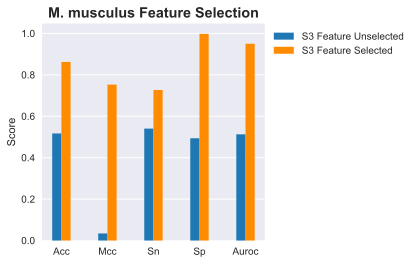

In [9]:
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn')
fig = plt.figure(figsize=(4,4))
plt.title('M. musculus Feature Selection',fontsize='x-large',fontweight='heavy')
barwith = 0.2
x = np.arange(5)
yMo = [0.5169491525423728,0.033935187358708145,0.5402542372881356,0.4936440677966102,0.5125947534281576]
yM = [0.8622881355932204,0.7527855249084083,0.7266949152542372,0.9978813559322034,0.9501855449217131]
plt.bar(x=x,height=yMo,width=barwith,color='tab:blue',align='center',label='S3 Feature Unselected')
plt.bar(x=x+barwith,height=yM,width=barwith,color='darkorange',align='center',label='S3 Feature Selected')
tick_label=['Acc','Mcc','Sn','Sp','Auroc']
plt.xticks(x+barwith*0.5,tick_label)
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.grid(axis='x')
ax = plt.gca()
plt.show()
fig.savefig('C:/Users/Jensen Wang/Desktop/Supp/MmusculusComparison.eps',dpi=1200,format='eps',bbox_inches='tight')